In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array


SIZE = (224, 224)
caminho_bases = os.path.join('..', 'bases', 'vazios')
caminho_train = os.path.join(caminho_bases, 'train')
caminho_train_vazio = os.path.join(caminho_bases, 'train',  'vazio')
caminho_train_nvazio = os.path.join(caminho_bases, 'train', 'nvazio')
caminho_test = os.path.join(caminho_bases, 'test')
caminho_test_vazio = os.path.join(caminho_bases, 'test',  'vazio')
caminho_test_nvazio = os.path.join(caminho_bases, 'test', 'nvazio')

In [2]:
destino_bases = os.path.join('..', 'bases', 'vazios_augmented')
destino_train = os.path.join(destino_bases, 'train')
destino_train_vazio = os.path.join(destino_bases, 'train',  'vazio')
destino_train_nvazio = os.path.join(destino_bases, 'train', 'nvazio')
destino_test = os.path.join(destino_bases, 'test')
destino_test_vazio = os.path.join(destino_bases, 'test',  'vazio')
destino_test_nvazio = os.path.join(destino_bases, 'test', 'nvazio')
if not os.path.exists(destino_bases):
    os.mkdir(destino_bases)
if not os.path.exists(destino_train):
    os.mkdir(destino_train)
if not os.path.exists(destino_train_vazio):
    os.mkdir(destino_train_vazio)
if not os.path.exists(destino_train_nvazio):
    os.mkdir(destino_train_nvazio)
if not os.path.exists(destino_test):
    os.mkdir(destino_test)
if not os.path.exists(destino_test_vazio):
    os.mkdir(destino_test_vazio)
if not os.path.exists(destino_test_nvazio):
    os.mkdir(destino_test_nvazio)

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    horizontal_flip=True,
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    caminho_train,
    target_size=SIZE,
    batch_size=200,
    class_mode='binary',
    shuffle=False

)

Found 20845 images belonging to 2 classes.


In [5]:
with open('X_names_threshold_train', 'r') as f:
    excluded_filenames = f.readlines()

excluded_filenames = [filename.strip().split('/')[1] for filename in excluded_filenames]
# excluded_filenames

In [7]:
## Criar exemplos de treinamento aumentados 2 vezes
for r in range(2):
    cont = 0
    batch_num = 1
    train_generator.reset()
    for X, y  in train_generator:
        print('batch n. %s' % batch_num)
        batch_num +=1
        if cont >= len(train_generator.filenames):
            break
        for ind, (img, label) in enumerate(zip(X, y)):
            try:
                name = train_generator.filenames[cont]
            except IndexError:
                break
            # print(name)
            name = name.split('/')[1]
            cont += 1
            if name in excluded_filenames:
                print('pulando %s' % name)
                continue
            image = array_to_img(img)
            if label == 0:
                image.save(os.path.join(destino_train_nvazio, str(r) + '_' + name ))
            else:
                image.save(os.path.join(destino_train_vazio, str(r) + '_' + name ))


batch n. 1
pulando 5aa18b542a87953d7e02885b.jpg
pulando 5aa18b562a87953d7e028abb.jpg
pulando 5aa18b582a87953d7d029379.jpg
pulando 5aa18b5b2a87953d7e028e37.jpg
pulando 5aa18b5c2a87953d7e028f27.jpg
pulando 5aa18b5d2a87953d7e028fa9.jpg
pulando 5aa18b612a87953d7e02923d.jpg
pulando 5aa18b6a2a87953d7f028bee.jpg
pulando 5aa18b742a87953d80029671.jpg
pulando 5aa18b7a2a87953d7d02a4c2.jpg
pulando 5aa18b7e2a87953d7d02a686.jpg
pulando 5aa18b842a87953d7e02a2c2.jpg
pulando 5aa18b852a87953d7e02a336.jpg
pulando 5aa18b852a87953d7e02a35a.jpg
pulando 5aa18c872a87953ebc5755cb.jpg
pulando 5aa18ca42a87953ebe575e9f.jpg
pulando 5aa18cc22a87953ebe57643f.jpg
pulando 5aa18ce02a87953ebe576848.jpg
pulando 5aa18ce22a87953ebe576880.jpg
pulando 5aa18ce22a87953ebe576884.jpg
pulando 5aa18d0c2a87953ebc5765c0.jpg
pulando 5aa18d1e2a87953ebe5770f4.jpg
pulando 5aa18d312a87953ebc576b70.jpg
pulando 5aa18d342a87953ebc576c24.jpg
pulando 5aa18d352a87953ebc576ca4.jpg
pulando 5aa18db92a87953ebf5778ad.jpg
pulando 5aa18dbd2a87953ebf5

pulando 5aabff2c2a879503d606b1ea.jpg
pulando 5aabff2d2a879503d606b256.jpg
pulando 5aac01c32a879503d606e0f6.jpg
pulando 5aac01c32a879503d606e102.jpg
pulando 5aac01c52a879503d606e25e.jpg
pulando 5aac01d02a879503da068d4f.jpg
pulando 5aac01d42a879503d606ee44.jpg
pulando 5aac01d52a879503da068fff.jpg
pulando 5aac03942a879503da0693bd.jpg
pulando 5aac03a52a879503da069649.jpg
pulando 5aac03b32a879503d8069c22.jpg
pulando 5aac03b32a879503da069d05.jpg
pulando 5aac03b62a879503d8069e4a.jpg
pulando 5aac03b62a879503da069edd.jpg
pulando 5aac03b82a879503d806a082.jpg
pulando 5aac03b82a879503da06a151.jpg
pulando 5aac03b92a879503da06a19d.jpg
pulando 5aac047b2a879503da06b87f.jpg
pulando 5aac05552a879503d6073e67.jpg
pulando 5aac05552a879503d6073f0b.jpg
pulando 5aac05552a879503d6073f1b.jpg
pulando 5aac05552a879503d6073f9f.jpg
pulando 5aac05592a879503d6074361.jpg
pulando 5aac05592a879503da06c41e.jpg
pulando 5aac055a2a879503d607448d.jpg
pulando 5aac055a2a879503d6074499.jpg
pulando 5aac055c2a879503d607472d.jpg
p

pulando 5aa1df812a87950ba3abb745.jpg
pulando 5aa1df852a87950ba3abbf03.jpg
pulando 5aa1df852a87950ba3abbff3.jpg
pulando 5aa1df852a87950ba3abbffb.jpg
pulando 5aa1e05b2a87950ba6abc362.jpg
pulando 5aa1e0622a87950ba4abe09e.jpg
pulando 5aa1e0632a87950ba5abd11a.jpg
pulando 5aa1e0672a87950ba3abce44.jpg
pulando 5aa1e1442a87950ba6abdc73.jpg
pulando 5aa1e1452a87950ba6abdf33.jpg
pulando 5aa1e1452a87950ba6abdf67.jpg
pulando 5aa1e2202a87950ba4ac0273.jpg
pulando 5aa1e2202a87950ba4ac0333.jpg
pulando 5aa1e2222a87950ba4ac0853.jpg
pulando 5aa1e2232a87950ba4ac0bb7.jpg
pulando 5aa1e2272a87950ba5abeea2.jpg
batch n. 4
pulando 5aa1e2282a87950ba5abf0c6.jpg
pulando 5aa1e2282a87950ba5abf106.jpg
pulando 5aa1e2282a87950ba6abe828.jpg
pulando 5aa1e2282a87950ba6abe938.jpg
pulando 5aa1e22e2a87950ba5abfa3b.jpg
pulando 5aa1e2322a87950ba5ac00db.jpg
pulando 5aa1e2332a87950ba6abfbaf.jpg
pulando 5aa1e2342a87950ba6abfdfb.jpg
pulando 5aa1e2352a87950ba6ac00a1.jpg
pulando 5aa1e3072a87950ba3abe2c6.jpg
pulando 5aa1e3072a87950ba4a

batch n. 9
batch n. 10
batch n. 11
batch n. 12
batch n. 13
batch n. 14
batch n. 15
batch n. 16
batch n. 17
batch n. 18
batch n. 19
batch n. 20
batch n. 21
batch n. 22
batch n. 23
batch n. 24
batch n. 25
batch n. 26
batch n. 27
batch n. 28
batch n. 29
batch n. 30
batch n. 31
batch n. 32
batch n. 33
batch n. 34
batch n. 35
batch n. 36
batch n. 37
batch n. 38
batch n. 39
batch n. 40
batch n. 41
batch n. 42
batch n. 43
batch n. 44
batch n. 45
batch n. 46
batch n. 47
pulando 5c59d57ee450c2e8116aaeb2.jpg
batch n. 48
batch n. 49
batch n. 50
batch n. 51
batch n. 52
batch n. 53
batch n. 54
batch n. 55
batch n. 56
batch n. 57
batch n. 58
pulando 5aac07332a879503d506eb7b.jpg
batch n. 59
pulando 5aac1c902a87952f4b132167.jpg
batch n. 60
batch n. 61
batch n. 62
batch n. 63
batch n. 64
batch n. 65
batch n. 66
batch n. 67
batch n. 68
batch n. 69
batch n. 70
batch n. 71
batch n. 72
pulando 5c5ddfd5e450c2b42cd8dde7.jpg
batch n. 73
batch n. 74
batch n. 75
batch n. 76
batch n. 77
batch n. 78
pulando 5c644

In [8]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    horizontal_flip=True,
)

In [9]:
test_generator = train_datagen.flow_from_directory(
    caminho_test,
    target_size=SIZE,
    batch_size=200,
    class_mode='binary',
    shuffle=False
)

Found 2317 images belonging to 2 classes.


In [10]:
with open('X_names_threshold_test', 'r') as f:
    excluded_filenames = f.readlines()
    
excluded_filenames = [filename.strip().split('/')[1] for filename in excluded_filenames]
# excluded_filenames

In [11]:
## Criar exemplos de teste aumentados 2 vezes
for r in range(1):
    cont = 0
    batch_num = 1
    test_generator.reset()
    for X, y  in test_generator:
        print('batch n. %s' % batch_num)
        batch_num +=1
        if cont >= len(test_generator.filenames):
            break
        for ind, (img, label) in enumerate(zip(X, y)):
            try:
                name = test_generator.filenames[cont]
            except IndexError:
                break
            # print(name)
            name = name.split('/')[1]
            cont += 1
            if name in excluded_filenames:
                print('pulando %s' % name)
                continue
            image = array_to_img(img)
            if label == 0:
                image.save(os.path.join(destino_test_nvazio, str(r) + '_' + name ))
            else:
                image.save(os.path.join(destino_test_vazio, str(r) + '_' + name ))


batch n. 1
pulando 5aa18b5c2a87953d7e028f27.jpg
pulando 5aa18b742a87953d80029671.jpg
pulando 5aa18c872a87953ebc5755cb.jpg
pulando 5aa18daf2a87953ebe5777d9.jpg
pulando 5aa18dbd2a87953ebf577935.jpg
pulando 5aa18f952a8795416e68a0b9.jpg
pulando 5aa193932a879542bf0f3f03.jpg
pulando 5aa1b35d2a87955d1d841ebd.jpg
pulando 5aa1b7ed2a87955d1e844328.jpg
pulando 5aa1cb792a87957e64f49f7e.jpg
pulando 5aa1d58c2a87950257b1868c.jpg
pulando 5aa1d5e32a87950257b19012.jpg
pulando 5aa1dda22a8795025ab1a1b8.jpg
pulando 5aa1dda52a8795025ab1a784.jpg
pulando 5aa1dda52a8795025ab1a7a8.jpg
pulando 5aa1de942a87950afddd37da.jpg
pulando 5aa1de9a2a87950afcdd3dc3.jpg
pulando 5aa1de9b2a87950afcdd4063.jpg
pulando 5aa1de9b2a87950afddd4374.jpg
pulando 5aa1de9b2a87950afddd4454.jpg
pulando 5aa1e0632a87950ba5abd116.jpg
pulando 5aa1e1452a87950ba6abdf67.jpg
pulando 5aa1e2272a87950ba5abeea2.jpg
pulando 5aa1e2282a87950ba5abf106.jpg
pulando 5aa1e2342a87950ba6abfdfb.jpg
pulando 5aa1e4ce2a87950ba5ac254d.jpg
pulando 5aa1e4d02a87950ba5a

## Check generated images

31026


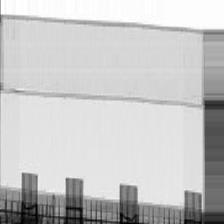

In [16]:
import random
from PIL import Image
imgs = os.listdir(destino_train_vazio)
print(len(imgs))
pil_image = Image.open(os.path.join(destino_train_vazio, random.choice(imgs)))
pil_image

30498


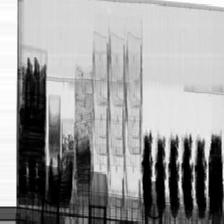

In [17]:
imgs = os.listdir(destino_train_nvazio)
print(len(imgs))
pil_image = Image.open(os.path.join(destino_train_nvazio, random.choice(imgs)))
pil_image

2300


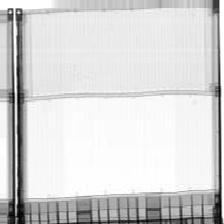

In [14]:
imgs = os.listdir(destino_test_vazio)
print(len(imgs))
pil_image = Image.open(os.path.join(destino_test_vazio, random.choice(imgs)))
pil_image

In [15]:
img_to_array(pil_image)

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[149., 149., 149.],
        [147., 147., 147.],
        [142., 142., 142.],
        ...,
        [ 33.,  33.,  33.],
        [ 98.,  98.,  98.],
        [216., 216., 216.]],

       [[132., 132., 132.],
        [131., 131., 131.],
        [126., 126., 126.],
        ...,
        [ 44.,  44.,  44.],
        [105., 105., 105.],
        [212., 212., 212.]],

       [[154., 154., 154.],
        [157., 157., 157.],
        [156., 1